# 7.2 Error bound for a jump discontinuity
see https://arxiv.org/abs/2305.00066

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

8.030570172000001


In [4]:
m, n = 2500, 2500
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

r = min(m, n)
i = np.arange(0, r)

## generate snapshot matrix

In [5]:
u_hs = Heaviside()
X = u_hs(x(), mu())

X[np.abs(X)<1e-6] = 1.0

## calculate $d_N$ for various discretizations

In [6]:
d_N_low_res = {}
for m_ in np.arange(1000, 11000, 1000):
    n_ = m_
    print(m_)
    x = Domain([0, 1], m_)
    mu = Domain([0, 1], n_)
    X_ = u_hs(x(), mu())
    X_[np.abs(X_)<1e-6] = 1.0
    trig_basis_odd_ = TrigonometricOdd(x())
    d_N, S = trig_basis_odd_.calc_error_analytic(X_)
    d_N_low_res[m_] = d_N

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


## sort basis vectors according to the norm of the projection terms, see Corollary 4.6
not actually needed here, we plot the projection terms for visual validation anyway

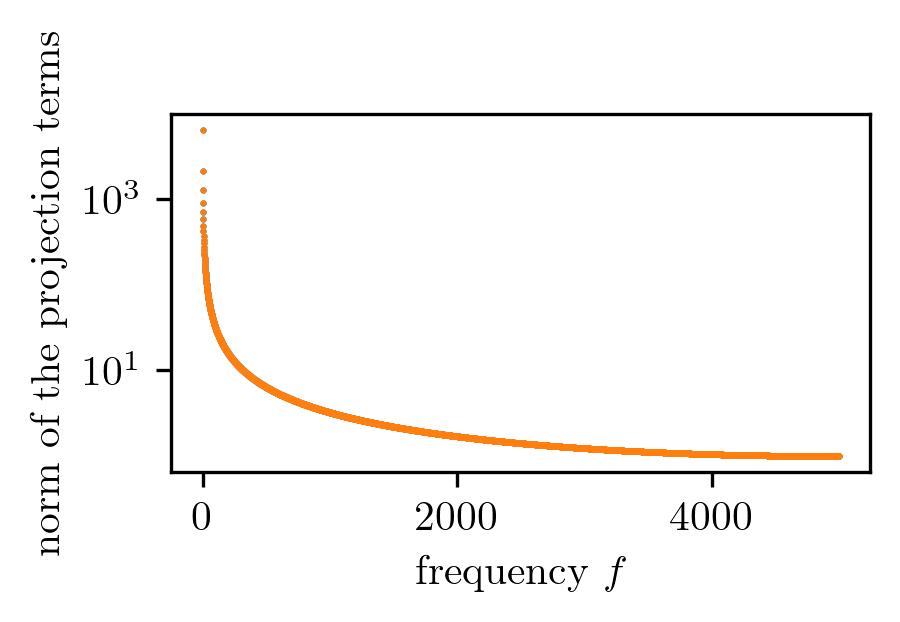

In [7]:
trig_basis_odd_.sort(X_)

## exact decay according to equ. 4.4

In [8]:
r = 5000
N = np.arange(1, r+1)
floor_kp1 = (2*np.floor((np.arange(500000000)+1)/2, dtype=np.float64)-1) # higher prcision is important here
d_N_exact = (4/np.pi**2 * np.cumsum((floor_kp1**-2)[::-1])[::-1][:r])**.5
print(d_N_exact.shape)

(5000,)


## Fig. 1: Kolmorogov $N$-width $d_N (P)$ width for a discontinuous function – comparison of POD, exact form of $d_N (P)$ and known asymptotic rate.

1000
1000 (1000,) (1000,)
2000
2000 (2000,) (2000,)
3000
3000 (3000,) (3000,)
4000
4000 (4000,) (4000,)
5000
5000 (5000,) (5000,)
6000
6000 (6000,) (6000,)
7000
7000 (7000,) (7000,)
8000
8000 (8000,) (8000,)
9000
9000 (9000,) (9000,)
10000
10000 (10000,) (10000,)
attempting to save


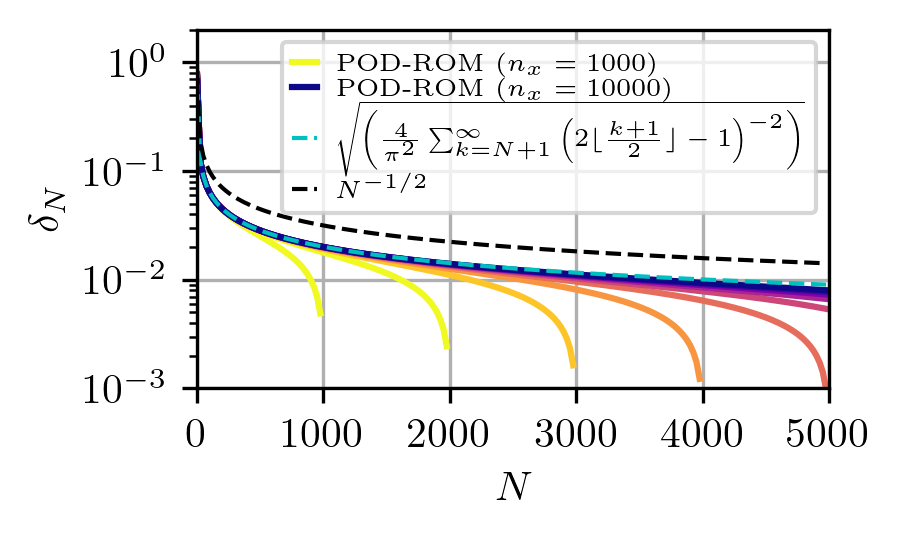

5000


In [9]:
lbl1 = r'$2*\sqrt {\left( \frac{2}{N \pi^2} \right)}$'
lbl2 =  r'$2 \sqrt {\left( \frac{1}{2} - \frac{4}{\pi^2} \sum_{i=1}^N  \frac{1}{(2i-1)^2 } \right)}$'
lbl3 =  r'$\sqrt {\left(  \sum_{k=N+1}^\infty  \frac{8}{(2k-1)^2 \pi^2} \right)}$'

lbl_new =  r'$\sqrt{\left(  \frac{4}{\pi^2}  \sum_{k=N+1}^\infty \left(2 \lfloor \frac{k+1}{2} \rfloor - 1 \right)^{-2}\right)}$'
decay_exact_old = 2*(1/2 - 4/np.pi**2*np.cumsum(1/(2*N-1)**2))**.5
decay_estimate = (2/(N*np.pi**2))**.5

#t = 8/ ((2*k-1)**2*np.pi**2 )
#res = np.cumsum(t[::-1])[::-1]
#decay_new = res[i]**.5

p = 25

fig, ax = plt.subplots()
#ax.plot(N, d_N, "b.", ms=1, label="POD-ROM")
i = 9
for key, val in d_N_low_res.items():
    print(key)
    color = cmap(i/8)
    i -= 1
    Nn = np.arange(1, key+1)
    d_N = val
    if key in [1000, 10000]:
        lbl = "POD-ROM ($n_x={:.0f}$)".format(key)
    else:
        lbl = None
    print(key, Nn.shape, d_N.shape)
    ax.plot(Nn[1::p], d_N[1::p], "-", label=lbl, ms=1, color=color)

#ax.plot(Nn, d_N, "b.", ms=1, label="POD-ROM (a={:.0f})".format(key), color=color)
ax.plot(N[1::p], d_N_exact[1::p], "c--", label=lbl_new, lw=1)
#ax.plot(N, decay_exact_old, "r--", label=lbl2, lw=1)
#ax.plot(i, decay_estimate, "g--", label=lbl1, lw=1)
#ax.plot(N, decay_new, "b--", label=lbl3, lw=1)
ax.plot(N[1::p], N[1::p]**-.5, "k--", label=r'$N^{-1/2}$', lw=1) # too high?
#ax.plot(N, 1/2*N**-.5, "c--", label=r'$\frac{1}{2}N^{-1/2}$', lw=1)


ax.set_yscale('log')
plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$\delta_N$')
ax.set_xlim([0, r])
ax.set_ylim([1e-3, 2])
plt.grid()
print("attempting to save")
plt.tight_layout()
plt.savefig(pth+"error_heaviside_new.pdf")
plt.show()
print(r)

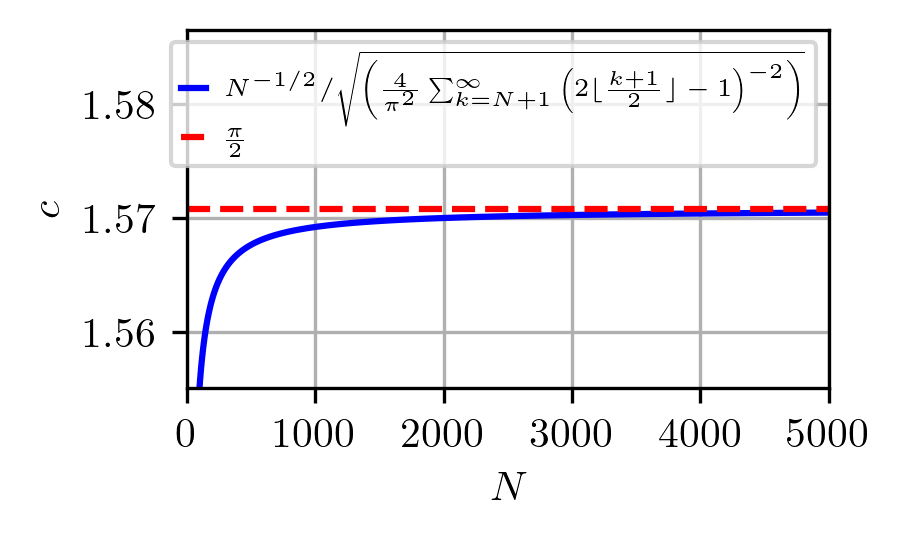

1.5707964570634942
1.5707963267948966


In [10]:
p = 1
plt.plot(N[::p], (N**-.5/d_N_exact)[::p], "b-", ms=1, label=r'$N^{-1/2}/$'+lbl_new)
#plt.plot(N**-.5/decay_exact_old, "g.", ms=1, label=r'$N^{-1/2}/$'+lbl2)
plt.plot([0, r], [np.pi/2, np.pi/2], "r--", ms=1, label=r'$\frac{\pi}{2}$')
#plt.xlim([0, 100])
plt.ylim([np.pi/2 * .99, np.pi/2 * 1.01])
plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$c$')
plt.xlim([0, r])
plt.grid()
plt.tight_layout()
plt.savefig(pth+"estimate_HS.pdf")
plt.show()
print((N**-.5/decay_exact_old)[100:].mean())
print(np.pi/2)